### Задание 3


**Импортирование данных**

In [1]:
import pandas as pd

df = pd.read_csv("./Renewable_Energy_Usage_Sampled.csv", sep= ",")
print(df)

    Household_ID         Region      Country Energy_Source  Monthly_Usage_kWh  \
0         H01502  North America          USA         Hydro            1043.49   
1         H02587      Australia    Australia    Geothermal             610.01   
2         H02654  North America          USA       Biomass            1196.75   
3         H01056  South America     Colombia       Biomass             629.67   
4         H00706         Africa        Egypt         Hydro             274.46   
..           ...            ...          ...           ...                ...   
995       H04712           Asia        Japan          Wind            1056.65   
996       H02314  North America          USA          Wind            1182.33   
997       H03215         Europe      Germany          Wind             417.88   
998       H02733      Australia    Australia       Biomass             258.91   
999       H01927      Australia  New Zealand       Biomass             455.84   

     Year  Household_Size I

**Вывод информации о типах данных в наборе и основной статистики**

In [2]:
print("\nИнформация о типах данных:")
df.info()

print("\nОсновная статистическая информация:")
print(df.describe())



Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Household_ID       1000 non-null   object 
 1   Region             1000 non-null   object 
 2   Country            1000 non-null   object 
 3   Energy_Source      1000 non-null   object 
 4   Monthly_Usage_kWh  1000 non-null   float64
 5   Year               1000 non-null   int64  
 6   Household_Size     1000 non-null   int64  
 7   Income_Level       1000 non-null   object 
 8   Urban_Rural        1000 non-null   object 
 9   Adoption_Year      1000 non-null   int64  
 10  Subsidy_Received   1000 non-null   object 
 11  Cost_Savings_USD   1000 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 93.9+ KB

Основная статистическая информация:
       Monthly_Usage_kWh         Year  Household_Size  Adoption_Year  \
count        1000.0000

**Удаление дубликатов строк**

In [3]:
print(f"\nКоличество дубликатов до удаления: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Количество дубликатов после удаления: {df.duplicated().sum()}\n")


Количество дубликатов до удаления: 0
Количество дубликатов после удаления: 0



### Задание 4

**Удаление поля** `Household_ID`

In [4]:
df=df.drop(columns=["Household_ID"])
print(df)


            Region      Country Energy_Source  Monthly_Usage_kWh  Year  \
0    North America          USA         Hydro            1043.49  2024   
1        Australia    Australia    Geothermal             610.01  2024   
2    North America          USA       Biomass            1196.75  2024   
3    South America     Colombia       Biomass             629.67  2024   
4           Africa        Egypt         Hydro             274.46  2022   
..             ...          ...           ...                ...   ...   
995           Asia        Japan          Wind            1056.65  2021   
996  North America          USA          Wind            1182.33  2020   
997         Europe      Germany          Wind             417.88  2023   
998      Australia    Australia       Biomass             258.91  2020   
999      Australia  New Zealand       Biomass             455.84  2020   

     Household_Size Income_Level Urban_Rural  Adoption_Year Subsidy_Received  \
0                 5          Lo

**Переименование поля** `Region` **в поле** `Continent`

In [5]:
df = df.rename(columns= {'Region':'Continent'})
print(df)

         Continent      Country Energy_Source  Monthly_Usage_kWh  Year  \
0    North America          USA         Hydro            1043.49  2024   
1        Australia    Australia    Geothermal             610.01  2024   
2    North America          USA       Biomass            1196.75  2024   
3    South America     Colombia       Biomass             629.67  2024   
4           Africa        Egypt         Hydro             274.46  2022   
..             ...          ...           ...                ...   ...   
995           Asia        Japan          Wind            1056.65  2021   
996  North America          USA          Wind            1182.33  2020   
997         Europe      Germany          Wind             417.88  2023   
998      Australia    Australia       Biomass             258.91  2020   
999      Australia  New Zealand       Biomass             455.84  2020   

     Household_Size Income_Level Urban_Rural  Adoption_Year Subsidy_Received  \
0                 5          Lo

### Задание 5

**Построить гистограмму распределения ежемесячного потребления энергии в киловатт-часах**

In [6]:
#%pip install seaborn

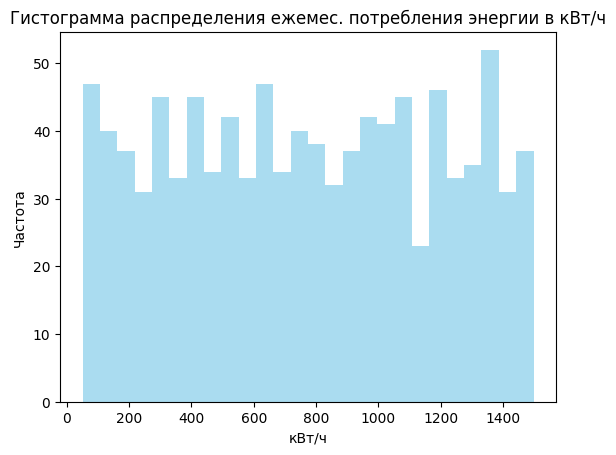

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.title('Гистограмма распределения ежемес. потребления энергии в кВт/ч')

plt.hist(df['Monthly_Usage_kWh'], bins =26, color= 'skyblue', alpha= 0.7)

plt.xlabel('кВт/ч', fontsize=10)
plt.ylabel('Частота', fontsize=10)

plt.show()

**Построить диаграмму "ящик с усами" для признака:** _Ежемесячная экономия в долларах США за счет использования возобновляемых источников энергии._

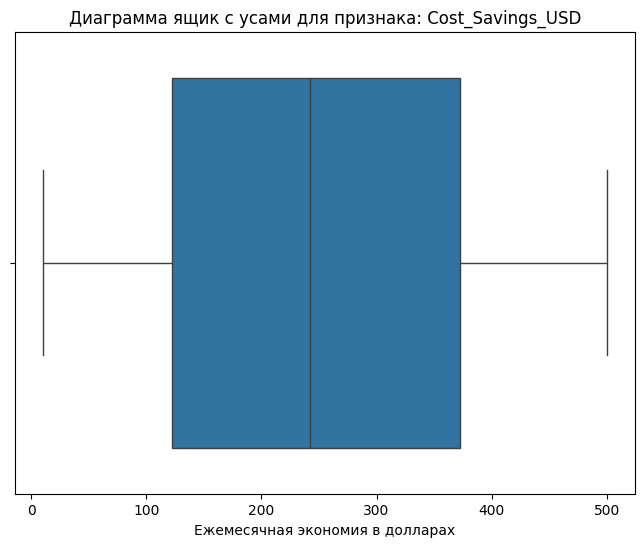

In [8]:
plt.figure(figsize=(8,6))

cost_savings_usd = "Cost_Savings_USD"

sns.boxplot(x=df[cost_savings_usd])
plt.title(f"Диаграмма ящик с усами для признака: {cost_savings_usd}")
plt.xlabel("Ежемесячная экономия в долларах")
plt.show()

**Построить круговую диаграмму на основе типа домохозяйства**

(`Urban`: городской, `Rural`: сельский)

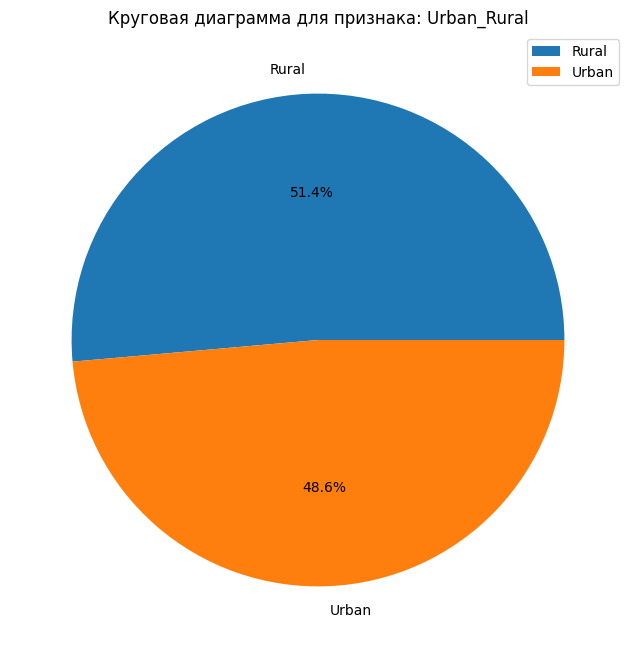

In [9]:
urban_rural = "Urban_Rural"
plt.figure(figsize=(8,8))

df[urban_rural].value_counts().plot(kind= "pie", autopct= '%1.1f%%')

plt.ylabel('')
plt.legend()

plt.title(f"Круговая диаграмма для признака: {urban_rural}")

plt.show()

**Построить тепловую карту со значениями взаимной корреляции между всеми парами признаков набора данных**

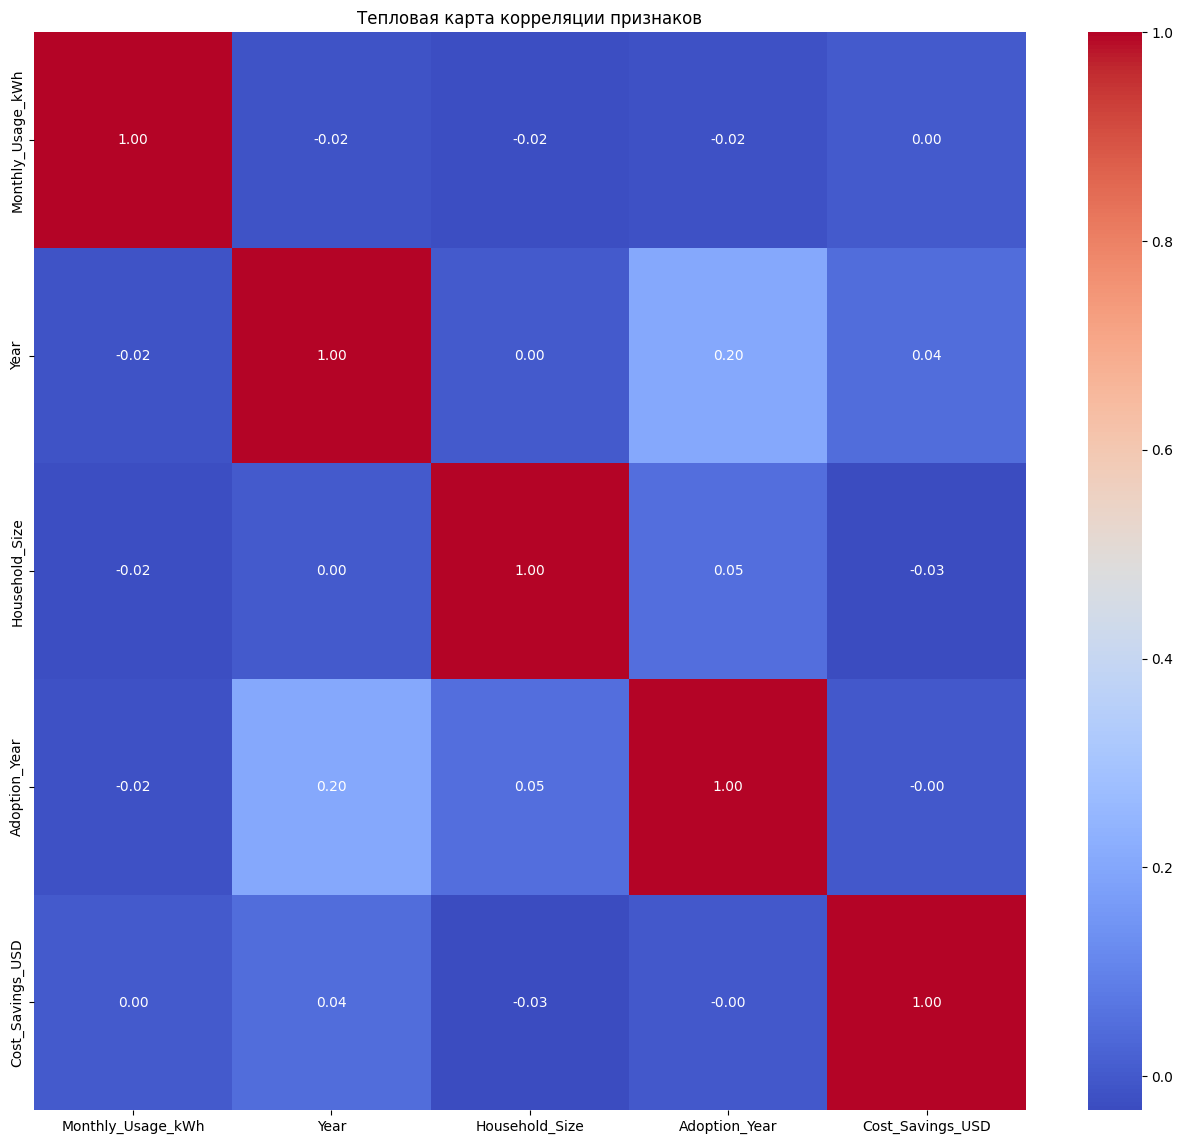

In [10]:
corr_matrix = df.corr(numeric_only=True) 


plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции признаков')
plt.show()

**Построить диаграмму countplot с группировкой по признакам** `Continent` (регион) и `Income_Level` (уровень дохода)

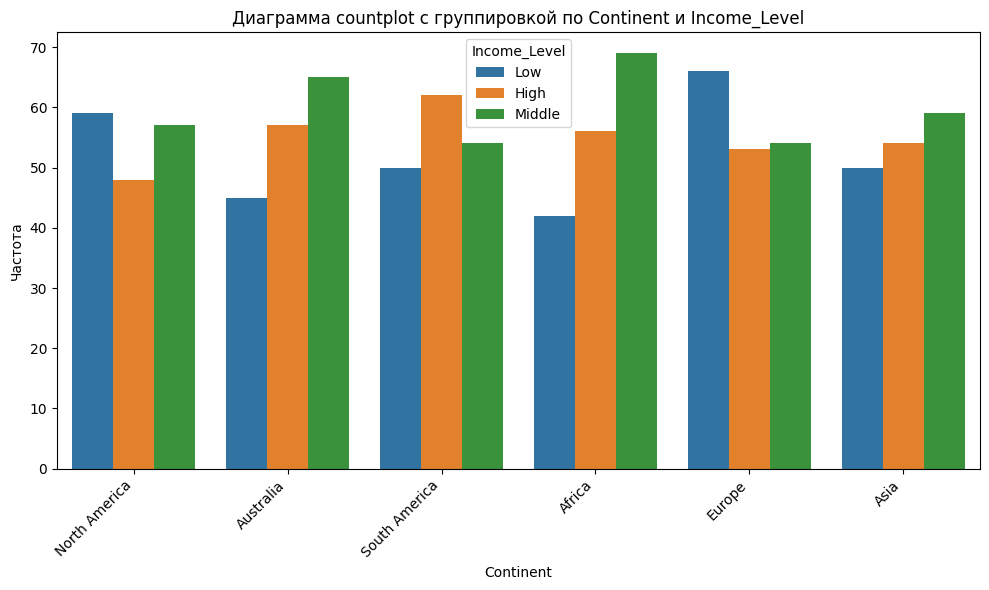

In [11]:
region = "Continent"

income = "Income_Level"
plt.figure(figsize=(10, 6))
sns.countplot(x=region, hue=income, data=df)
plt.title(f'Диаграмма countplot с группировкой по {region} и {income}')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Частота")
plt.tight_layout()
plt.show()

### Задани 6

Проверить наличие пропусков в данных. Если в каких либо столбцах
присутствуют пропуски - заполнить их в соответствии со следующим
правилом:
- a. если значением признака является целое число, заполните
значением медианы по данному столбцу;
- b. если значением признака является действительное число,
заполните средним значением по данному столбцу;
- c. иначе заполните значением моды по данному столбцу.

In [12]:
def fill_miss(df):
    for column in df.columns:
        if df[column].isnull().any():
            print(f"Столбец '{column}' содержит пропуски.")
            if pd.api.types.is_integer_dtype(df[column]):
                median_value = df[column].median()
                df[column] = df[column].fillna(median_value)
                print(f"  Пропуски в '{column}' заполнены медианой: {median_value}")

            elif pd.api.types.is_float_dtype(df[column]):
                mean_value = df[column].mean()
                df[column] = df[column].fillna(mean_value)
                print(f"  Пропуски в '{column}' заполнены средним значением: {mean_value}")

            else:
                mode_value = df[column].mode()[0] 
                df[column] = df[column].fillna(mode_value)
                print(f"  Пропуски в '{column}' заполнены модой: {mode_value}")
        else:
            print(f"Столбец '{column}' не содержит пропусков.")

    return df


In [13]:
df = fill_miss(df)

Столбец 'Continent' не содержит пропусков.
Столбец 'Country' не содержит пропусков.
Столбец 'Energy_Source' не содержит пропусков.
Столбец 'Monthly_Usage_kWh' не содержит пропусков.
Столбец 'Year' не содержит пропусков.
Столбец 'Household_Size' не содержит пропусков.
Столбец 'Income_Level' не содержит пропусков.
Столбец 'Urban_Rural' не содержит пропусков.
Столбец 'Adoption_Year' не содержит пропусков.
Столбец 'Subsidy_Received' не содержит пропусков.
Столбец 'Cost_Savings_USD' не содержит пропусков.


### Задание 7

**С помощью среза данных выбрать не более 200 значений признака** `Adoption_Year` (год, когда домохозяйство перешло на возобновляемые источники энергии)

In [14]:
from scipy import stats

selection = df['Adoption_Year'].sample(n=200)

print(selection)

782    2011
992    2021
125    2013
2      2017
720    2017
       ... 
832    2020
791    2017
742    2020
317    2014
360    2014
Name: Adoption_Year, Length: 200, dtype: int64


**Проверить выборку на нормальность распределения с помощью** _normaltest_

In [15]:
alpha = 0.05
k, p = stats.normaltest(selection)


print(f"Значение P: {p}")

if(p<alpha):
    print("Выборка не является нормальной")
else:
    print("Выборка является нормальной")

Значение P: 4.2935826991307424e-18
Выборка не является нормальной


### Задание 8

**Выполнить one-hot кодирование всех категориальных признаков:**

- `Country`
- `Continent`
- `Energy_Source`
- `Income_Level`
- `Urban_Rural`
- `Subsidy_Received`

In [16]:
categorical_cols = ['Continent', 'Energy_Source', "Income_Level", "Urban_Rural", "Subsidy_Received","Country"]

df = pd.get_dummies(df, columns=categorical_cols)


print("\nДатафрейм после one-hot кодирования:")
print(df)


Датафрейм после one-hot кодирования:
     Monthly_Usage_kWh  Year  Household_Size  Adoption_Year  Cost_Savings_USD  \
0              1043.49  2024               5           2012             10.46   
1               610.01  2024               4           2023             43.49   
2              1196.75  2024               8           2017             93.28   
3               629.67  2024               7           2023            472.85   
4               274.46  2022               7           2010             65.98   
..                 ...   ...             ...            ...               ...   
995            1056.65  2021               6           2018            307.67   
996            1182.33  2020               2           2019            125.96   
997             417.88  2023               6           2010            273.25   
998             258.91  2020               7           2017            224.35   
999             455.84  2020               7           2013            

### Задание 9

**Сохранить предобработанный набор данных в файл csv**

In [17]:
df.to_csv('result.csv', index=False)